#  <center> Obravnava resonančnega pojava</center>

<br>
<center>Dejan Križaj, 2019</center>

**Namen:** Zvezek je namenjen seznanjanju študentov z uporabo Jupytra za analizo resonančnega pojava. Pri tem bomo uporabili analizo vezja s kompleksnim računom. Spoznali boste različne načine obravnave in vizualizacije resonančnega pojava, tako v časovnem prostoru kot tudi s kazalci v kompleksni ravnini in predvsem s prikazom v frekvenčnem prostoru. Pokazali bomo tudi, kako se računalniško določi pomembne parametre kot so resonančna frekvenca, bočni frekvenci in pasovna širina.

**Povezani zvezki**:
* O obravnavi vezij vzbujanih z izmeničnimi signali s kompleksnim računom

<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div>

## Teorija - supernakratko

Analizo vezij s kompleksnim računom smo že spoznali v predhodnem zvezku. Analiza resonančnega pojava se nanaša na analizo vezja, vzbujanega z izmeničnim signalom, s pomočjo kompleksnega računa. Resonančni pojav nastopi tedaj, ko pride v vezju do največjega prehajanja iz magnetne energije v električno in nazaj. Tedaj pride v vezju do bolj ali manj izrazitega povečanja tokov ali napetosti, kar  imenujemo tokovna ali napetostna resonanca. Očitno je za to potrebno, da imamo v vezju vsaj en element, ki je sposoben shranjevati električno energijo (kondezator) in en element, ki je sposoben shranjevati magnetno energijo (tuljava). V praksi pa je to lahko tudi en sam element, na primer tuljava, ki pa ima zaradi realne strukture tudi medovojne kapacitivnosti, ki povzročijo, da ima sama tuljava resonančne lastnosti pri določeni frekvenci.

Vzemimo preprost primer vzbujanja zaporedne vezave upora, kondenzatorja in tuljave na izmenični vir napetosti. Za analizo takega preprostega vezja bi morali rešiti enačbo 

$u_g(t)=R i(t)+\frac{1}{C}\int{i(t) dt} + L \frac {d i(t)}{dt}$. 

To enačbo bi morali prevesti v diferencialno enačbo in jo rešiti, kar je tudi potrebno, če analiziramo prehodni pojav. Če pa nas zanima kvazistacionarno stanje (prehodni pojav že izzveni), pa tako tok kot napetostni nihajo z vzbujalno napetostjo. Analizo takega vezja lahko opravimo s prehodom v kompleksni račun, ki zgornjo enačbo prevede v algebrajsko enačbo za kompleksor toka $\underline{I}$ 

$\underline{U}=R \underline{I}+j\omega L \underline{I} + \frac{ 1}{j\omega C}\underline{I} $. 

Od tod sledi, da je kompleksor toka 
$\underline{I}=\frac{\underline{U}}{R +j\omega L +1/(j\omega C)}$. 

Če analiziramo zgornjo enačbo, ugotovimo, da bo tok največji tedaj, ko bo imenovalec najmanjši, to pa bo, ko bo $ \omega L = 1/(\omega C)$. Tedaj bo vezje v resonanci, tok pa bo enak kar $I=U/R$.

V nadaljevanju si oglejmo, kako izračunavamo in analiziramo resonančni pojav z Jupytrom.

## Obravnava zaporednega RLC vezja s kompleksnim računom
<img src="https://raw.githubusercontent.com/osnove/Slike/master/impedanca_RLC2.png" style="height:150px" align="left"> 

Izračunajmo tok v vezju za naslednje podatke:

$\quad u_G(t)=50 \cos (20 t) $  V  <br>
$\quad L=100 $ mH <br>
$\quad R = 2 \, \Omega$ <br>
$\quad C = 2 10^{-6} \, $ F <br>

In [1]:
import numpy as np
L=150e-3
R=20
C=1e-5
U=50
omega=1000
ZL=1j*omega*L
ZC=1/(1j*omega*C)
# Izračun impedance
ZRLC=R+ZL+ZC
print('ZRLC = ',ZRLC)
om0=1/(np.sqrt(L*C))
print(om0)

# Izračun kompleksorja toka
I=U/ZRLC
print('I = ',I)

# Izračun amplitude in faze
Iabs=abs(I); print('Iabs = ',Iabs)
fi=np.angle(I,deg=True); print('Faza = ',fi)
print('i(t) = ',np.round(Iabs,2),'sin (',np.round(omega,0),'t + ',np.round(fi),') A')

ZRLC =  (20+50j)
816.496580927726
I =  (0.3448275862068966-0.8620689655172413j)
Iabs =  0.9284766908852593
Faza =  -68.19859051364818
i(t) =  0.93 sin ( 1000 t +  -68.0 ) A


### Prikaz toka in napetosti v časovnem prostoru
Določili smo amplitudo in fazni kot toka. Sedaj lahko tvorimo časovni signal, kot smo to opisali v uvodu. Formalno to naredimo tako, da pomnožimo dobljeni kompleksor z $e^{j \omega t}$ in vzamemo realni del. V praksi to pomeni, da je rezultat $i(t)=I \sin (\omega t + \varphi)$. 

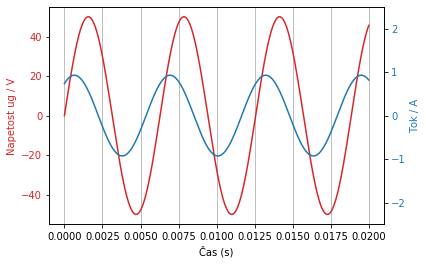

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

t = np.linspace(0.0, 20/omega, 1000)
ug=U*np.sin(omega*t)
i=Iabs*np.sin(omega*t+fi)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Čas (s)')
ax1.set_ylabel('Napetost ug / V', color=color)
ax1.plot(t, ug, color=color)

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='x')

ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
ax2.set_ylim(-U/R,U/R)
color = 'tab:blue'
ax2.set_ylabel('Tok / A', color=color)  
ax2.plot(t, i, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

#### Opravi naslednje analize:
1. Spreminjaj vrednosti krožne frekvence od 200 do 1200 s$^{-1}$ in opazuj amplitudo in fazni kot toka. X os je izdelana tako, da se normira na ogled par časovnih period, Y os je fiksirana na največjo možno amplitudo.

Nekoliko nerodno je stalno spreminjati krožno frekvenco in opazovati spremembe na grafu. Bolj elegantno se da to storiti z uporabo interaktivnih gradnikov, kot je na primer ipwidget. Spodnja celica kaže, kako narediti drsnik (slider), s katerim lahko spreminjamo krožno frekvenco vezja in opazujemo spremembe na grafu.

In [4]:
from ipywidgets import interactive

def f(omega):
    ZRLC=R+1j*omega*L+1/(1j*omega*C)
    I=U/ZRLC
    t = np.linspace(0.0, 20/omega, 1000)
    ug=U*np.sin(omega*t)
    i=abs(I)*np.sin(omega*t+np.angle(I,deg=True))

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Čas (s)')
    ax1.set_ylabel('Napetost ug / V', color=color)
    ax1.plot(t, ug, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(axis='x')
    ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
    ax2.set_ylim(-U/R,U/R)
    color = 'tab:blue'
    ax2.set_ylabel('Tok / A', color=color)  
    ax2.plot(t, i, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show()      # tok se izračunava znotraj funkcije, ki tudi vsakič znova izdela graf za vsako spremembo omega  # Razširi, če želiš videti vsebino

interactive_plot = interactive(f, omega=(500, 1500,25)) # spreminjamo omega od 500 do 1500 s korakom po 25
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=1000, description='omega', max=1500, min=500, step=25), Output()), _dom_…

Ob spreminjanju frekvence vzbujalnega signala ugotovimo, da pri določeni krožni frekvenci, ki je v konkretnem primeru okoli 825 1/s, tok doseže največjo amplitudo. To stanje vezja imenujemo **tokovna resonanca**. 

Zanimivo je pogledati tudi napetosti na posameznih elementih vezja pri spreminjanju frekvence. Pripravimo naslednjo celico tako, da bo prikazovala napetosti na posameznih elementih in tok v vezju. (Graf bo nekoliko natlačen, zato ga za lažje opazovanje povečamo.)

In [5]:
from ipywidgets import interactive

def f(omega):
    ZRLC=R+1j*omega*L+1/(1j*omega*C)
    I=U/ZRLC
    UL=1j*omega*L*I
    UC=I/(1j*omega*C)
    UR=R*I
    t = np.linspace(0.0, 20/omega, 1000)
    ug=U*np.sin(omega*t)
    i=abs(I)*np.sin(omega*t+np.angle(I,deg=True))
    ur=i*R
    uL=abs(UL)*np.sin(omega*t+np.angle(UL,deg=True))
    uC=abs(UC)*np.sin(omega*t+np.angle(UC,deg=True))
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    color = 'tab:red'
    ax1.set_xlabel('Čas (s)')
    ax1.set_ylabel('Napetost ug / V', color=color)
    ax1.plot(t, ug, color=color,label='ug')
    ax1.plot(t, uL,linestyle='--',color=color,label='uL')
    ax1.plot(t, uC,linestyle=':',color=color,label='uC')
    ax1.plot(t, ur,linestyle='-.',color='black',label='uR')
    ax1.legend()
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(axis='x')
    ax1.set_ylim(-10*U,10*U)
    ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
    ax2.set_ylim(-U/R,U/R)
    color = 'tab:blue'
    ax2.set_ylabel('Tok / A', color=color)  
    ax2.plot(t, i, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show()      # tok se izračunava znotraj funkcije, ki tudi vsakič znova izdela graf za vsako spremembo omega  # po potrebi razširi za ogled kode
    

interactive_plot = interactive(f, omega=(500, 1500,25)) # spreminjamo omega od 500 do 1500 s korakom po 25
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=1000, description='omega', max=1500, min=500, step=25), Output()), _dom_…

**Analiza opazovanja:** 
1. Najprej ugotovimo, da so napetosti na posameznih elementih vezja precej večje od amplitude napajalne napetosti. To je seveda možno, saj mora biti vsota vseh napetosti na elementih enaka vzbujalni napetosti, ker pa so napetosti na elementih vezja med sabo zamaknjene za četrt periode, so lahko v določenih razmerah zelo velike a se med seboj "navzven" odštejejo. Predvsem to velja za napetost na kondenzatorju in tuljavi. Napetost na kondenzatorju zaostaja za tokom za četrt periode, na tuljavi pa ga prehiteva za četrt periode. Napetost na kondenzatorju in tuljavi sta tako fazno zamaknjeni za pol periode ali 180 stopinj, kar pomeni, da se med seboj (navzven) odštevata.
2. Ker napetosti na posameznih elementih vezja precej presegajo napetost vzbujanja, to popravi v zgornji celici (išči ylim) in jo ponovno zaženi.
3. Kako izrazita je resonanca (kako izrazito je povečanje toka), je odvisno od velikosti upora. Če je ta majhen v primerjavi z reaktancama pri resonanci ($\omega_0 L$ in $\frac{1}{\omega_0 C}$), bo povečanje toka ob resonanci izrazito, sicer pa ne. Preveri to s spreminjanjem upornosti in ponovnim zagonom celic.


### Prikaz  kazalcev (kompleksorjev) toka in napetosti v kompleksni ravnini 

Način prikaza vzamemo iz datoteke <a href="https://github.com/osnove/Dodatno/blob/master/Obravnava_vezij_kompleksni_racun.ipynb">Obravnava_vezij_kompleksni_racun.ipynb </a>
  in uporabimo že izdelano funkcijo complex_plane3. Funkcija se nahaja v datoteki  <a href="https://github.com/osnove/other/blob/master/funkcije.py">funkcije.py </a>. To funkcijo morate imeti naloženo v isti mapi od koder zaganjate Jupytra. Če delate preko Colaba pa je najlažje, da se iz datoteke funkcije.py skopira funkcijo complex_plane3 v novo celico in se jo zažene, s čemer postane aktivna znotraj celotnega zvezka. v tem primer je potrebno zakomentirati prvo vrstico *from funkcije import complex_plane3*, saj je funkcija že zagnana znotraj zvezka.

Vsi kompleksorji napetosti so relativni na napetost vzbujanja, ki ima kazalec, ki je usmerjen v smeri realne osi (ker je fazni kot nič). Kazalec toka je odvisen od vrednosti impedanc, te pa od vrednosti elementov v vezju in frekvence. 

Kazalec napetosti na uporu je na sredini med kazalcema napetosti na kondenzatorju in tuljavi in je v fazi s kazalcev toka (ga ne rišemo, a vemo, da je tako). Če ima ta kazalec pozitivni fazni kot, pomeni, da tok v vezju prehiteva napetost na zunanjih sponkah. Takrat ima vezje kapacitivni značaj - napetost na kondenzatorju bo večja od napetosti na tuljavi. To bo pri nižjih frekvencah od resonančne, saj je tedaj je tedaj reaktanca kondenzatorja velika.

Z višanjem frekvence pa narašča napetost na tuljavi. Pri frekvenci večji od resonančne bo napetost na tuljavi večja od napetosti na kondenzatorju.

Pri resonančni frekvenci bo kazalec toka poravnan s kazalcem vzbujalne napetosti - torej usmerjen v smeri realne osi. Kazalca napetosti na tuljavi bosta tedaj enako velika.

In [0]:
complex_plane3?

UR= (50-3j)
UL= (16+307j)
UC= (-16-304j)


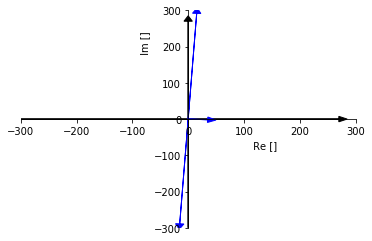

In [12]:
#from funkcije import complex_plane3

omega=820
ZRLC=R+1j*omega*L+1/(1j*omega*C)
I=U/ZRLC
UL=1j*omega*L*I
UC=I/(1j*omega*C)
UR=R*I
print('UR=',np.round(UR))
print('UL=',np.round(UL))
print('UC=',np.round(UC))

Kazalci=[UR,UL,UC]
complex_plane3(Kazalci,2,300) 

Za lažje opazovanje zopet izdelajmo interaktivni gradnik (widget), s katerim lahko spreminjamo krožno frekvenco. Ugotovimo, da se kazalci "vrtijo" v odvisnosti od izbrane frekvence. To je OK, saj je fiksiran kazalec vzbujalne napetosti (ker gre za vzbujanje s kosinusnim signalom brez dodane faze, je njegov kompleksor usmerjen v smeri realne osi), kazalec toka pa je odvisen od impedance, ta pa od frekvence. Kazalec toka ne izrisujemo, vendar vemo, da je usmerjen v isti smeri kot kompleksor napetosti na uporu, ki je umeščen med kazalca napetosti na kondenzatorju in tuljavi. 
Kazalec napetosti na tuljavi prehiteva kazalec toka za četrt periode, kazalec napetosti na kondenzatorju pa zaostaja za kazalcem toka za četrt periode.

Ko je vezje v resonanci, je kazalec toka usmerjen v isti smeri kot kazalec vzbujalne napetosti - torej v smeri realne osi. Tedaj sta kazalca napetosti na kondenzatorju in tuljavi največja. V bistvu so največji vsi trije kazalci. 

(Za bolj natančno spreminjanje frekvence spremeni step v ukazu interact.)

In [13]:
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def run_complex(omega):
    ZRLC=R+1j*omega*L+1/(1j*omega*C)
    I=U/ZRLC
    UL=1j*omega*L*I
    UC=I/(1j*omega*C)
    UR=R*I
    print('UR=',np.round(UR))
    print('UL=',np.round(UL))
    print('UC=',np.round(UC))

    Kazalci=[UR,UL,UC]
    complex_plane3(Kazalci,2,300)  # po potrebi razširi za ogled kode

interact(run_complex,omega=FloatSlider(min=650, max=950, step=25));

interactive(children=(FloatSlider(value=650.0, description='omega', max=950.0, min=650.0, step=25.0), Output()…

### Prikaz toka, napetosti in faze v frekvenčnem prostoru

Še najbolj informativen pa je prikaz v frekvenčnem prostoru. To pomeni, da nas zanima, kako se spreminjajo veličine (tok, napetost, faza) s spreminjanjem frekvence. Na X osi bo torej frekvenca, na Y osi pa absolutne vrednosti toka ali napetosti,  ali pa fazni kot.

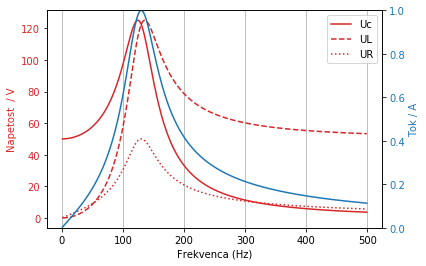

In [18]:
## Prikaz v frekvenčnem prostoru
L=150e-3
R=50
C=1e-5
U=50
freq=np.arange(1,500,1)
omega=2*np.pi*freq


ZRLC=R+1j*omega*L+1/(1j*omega*C)
I=U/ZRLC
Uc=I/(1j*omega*C)
UL=I*1j*omega*L

def f():
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Frekvenca (Hz)')
    ax1.set_ylabel('Napetost  / V', color=color)
    ax1.plot(freq, abs(Uc), color=color,label='Uc')
    ax1.plot(freq, abs(UL), color=color,Linestyle='--',label='UL')
    ax1.plot(freq, abs(I*R), color=color,Linestyle=':',label='UR')
    ax1.legend()
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(axis='x')

    ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
    ax2.set_ylim(0,U/R)
    color = 'tab:blue'
    ax2.set_ylabel('Tok / A', color=color)  
    ax2.plot(freq, abs(I), color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show() # po potrebi razširi
f() # razširi po potrebi

**Razlaga slike:** Zgornja slika nazorno prikaže frekvence, pri katerih je odziv vezja (tok) največji. Ko je tok največji, so največje tudi napetosti na posameznih elementih vezja. Napetost na tuljavi je enako velika kot napetost na kondenzatorju. Sta pa ti napetosti v protifazi (zamaknjeni za $\pi$), kar pa na tej sliki ni razvidno. Za ta vpogled je boljši prikaz v časovnem prostoru ali prikaz s kompleksorji v kompleksni ravnini. Napetost na kondenzatorju in tuljavi lahko tudi večkrat preseže amplitudo napajalne napetosti.

Opazimo tudi, da je pri nizkih frekvencah večina napetosti na kondenzatorju (ki ima veliko upornost pri nizkih frekvencah ($1/\omega C$), pri frekvencah nad resonančno pa je večina napetosti na tuljavi (saj upornost (reaktanca) tuljave linearno narašča s frekvenco - $\omega L$.

#### Opravi naslednje analize:
1. Spreminjaj kapacitivnost kondenzatorja in opazuj spremembe odziva.
2. Spreminjaj induktivnost tuljave in opazuj spremembe odziva.
3. Spreminjaj upornost in opazuj spremembe odziva.
4. Spremeni graf tako, da bo namesto napetosti in toka prikazoval fazni kot in tok. Poišči razlago za spreminjanje faze in poglej, koliko je fazni kot v resonanci. Za boljše opazovanje nariši še dodatno črto pri faznem kotu enakem 0 za celo frekvenčno področje. (Rešitev je na koncu zvezka)
5. Spremeni graf tako, da boš izrisal več krivulj toka za več različnih upornosti (lahko tudi kapacitivnosti ali induktivnosti). Za primer poglej zadnji primer v https://github.com/osnove/Dodatno/blob/master/Primer_diff_enacbe_analiticno.ipynb. (Rešitev je na koncu zvezka)

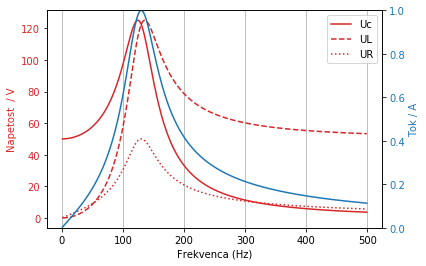

In [19]:
R=50
C=1e-5
U=50
freq=np.arange(1,500,1)
omega=2*np.pi*freq


ZRLC=R+1j*omega*L+1/(1j*omega*C)
I=U/ZRLC
Uc=I/(1j*omega*C)
UL=I*1j*omega*L

def f():
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Frekvenca (Hz)')
    ax1.set_ylabel('Napetost  / V', color=color)
    ax1.plot(freq, abs(Uc), color=color,label='Uc')
    ax1.plot(freq, abs(UL), color=color,Linestyle='--',label='UL')
    ax1.plot(freq, abs(I*R), color=color,Linestyle=':',label='UR')
    ax1.legend()
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(axis='x')

    ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
    ax2.set_ylim(0,U/R)
    color = 'tab:blue'
    ax2.set_ylabel('Tok / A', color=color)  
    ax2.plot(freq, abs(I), color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show() # po potrebi razširi
f() # razširi po potrebi


### Dodatni izračuni - resonančna frekvenca, bočni frekvenci, pasovna širina, kvaliteta vezja

Iz teorije vemo, da je pri zaporednem RLC vezju resonančna krožna frekvenca $\omega_0 = \frac{1}{\sqrt (LC)}$. Za bolj splošno RLC vezje je težje priti do analitičnega izraza zato si poglejmo, kako bi ga določili iz slike. Poiskati moramo največjo vrednost toka in pogledati, pri kateri frekvenci nastopi. Podoben primer smo obravnavali že pri iskanju časovne konstante v tem zvezku: https://github.com/osnove/Dodatno/blob/master/Primer_diff_enacbe_analiticno.ipynb.

Bočni frekvenci in pasovna širina sta podatka, ki dajeta informacije o obliki resonančne krivulje. Bočni frekvenci poiščemo tako, da poiščemo frekvenci, pri kateri je amplituda toka za koren iz 2 manjša od amplitude toka pri resonanci, torej $f_{bočna} = f(I=I(f_0)/\sqrt2)$. Za zaporedno RLC vezje jo je mogoče določiti analitično, mi bomo to naredili numerično, podobno, kot smo poiskali resonančno frekvenco.

Pasovna širina je preprosto razlika med zgornjo in spodnjo bočno frekvenco: $B=f_{zgornja}-f_{spodnja}$.

Poznamo tudi pojem normirane pasovne širine - normiramo jo z resonančno frekvenco, torej $B_{norm}=\frac{f_{zgornja}-f_{spodnja}}{f_0}$. Obratna vrednost od normirane pasovne širine je kvaliteta vezja $Q$. 
**Sam dopiši enačbe za izračun in izpis normirane pasovne širine in kvalitete v spodnjo celico.**

In [20]:
## Analitičen izračun resonančne frekvence
freq_0=1/(2*np.pi*np.sqrt(L*C))
print('Resonančna frekvenca = ',freq_0)

index_tok=np.where(abs(I)==max( abs(I))) # indeksi, kjer je izpolnjen pogoj
res_freq=freq[index_tok]
print('Iz grafa določena resonančna frekvenca = ',res_freq)
print()

## Poiščemo indekse, kjer je I>I/sqrt(2)
index_tok=np.where(abs(I)>( abs(max(I))/np.sqrt(2))) # indeksi, kjer je izpolnjen pogoj
#print(index_tok) # prvi indeks je kjer je spodnja bočna, zadnji, kjer je zgornja bočna frekvenca
f_spodnja=freq[index_tok[0][0]]
f_zgornja=freq[max(index_tok[0])]
f_pasovna=f_zgornja-f_spodnja
print('Spodnja bočna frekvenca = ',f_spodnja)
print('Zgornja bočna frekvenca = ',f_zgornja)
print('Pasovna širina = ',f_pasovna)

Resonančna frekvenca =  129.94946687227934
Iz grafa določena resonančna frekvenca =  [130]

Spodnja bočna frekvenca =  107
Zgornja bočna frekvenca =  159
Pasovna širina =  52


Spodaj je izris spodnje in zgornje bočne frekvence, ki sta izračunani v zgornji celici. 

**Opravi naslednje analize:** Spreminjaj vrednost upornosti in opazuj spremembe pasovne širine. Ali sprememba kapacitivnosti ali induktivnosti vpliva na spremembo pasovne širine? 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


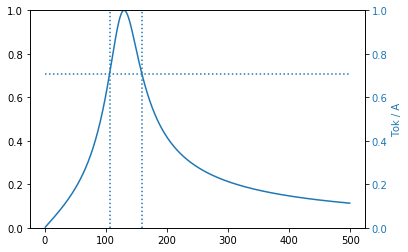

In [24]:
def f():
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
    ax2.set_ylim(0,U/R)
    color = 'tab:blue'
    ax2.set_ylabel('Tok / A', color=color)  
    ax2.plot(freq, abs(I), color=color)
    ax2.plot([min(freq),max(freq)], [max(I)/np.sqrt(2),max(I)/np.sqrt(2)], color=color,Linestyle=':') # naredi linijo pri faza=0
    ax2.plot([f_spodnja,f_spodnja], [0,U/R], color=color,Linestyle=':') # naredi linijo pri f_spodnja
    ax2.plot([f_zgornja,f_zgornja], [0,U/R], color=color,Linestyle=':') # naredi linijo pri f_zgornja
    
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show()
f()

In [0]:
### Dodatni prikazi in izračuni

### Zdaj pa ti

V tem zvezku smo pokazali možno obravnavo zaporednega RLC vezja in resonančnega pojava. V bistvu ima vsako vezje, ki vsebuje več kot en reaktivni element (element, ki shranjuje energijo v magnetnem ali električnem polju) možno resonančno stanje. Druga najbolj pogosta analiza je analiza vezja vporedno vezanih RLC elementov. Tam je seveda skupna enaka napetost, različni pa so tokovi v vezju. Privošči si analizo takega ali kakšnega podobnega vezja. Najlažje tako, da ta zvezek skopiraš, ga preimenuješ in preoblikuješ po svojih potrebah.


## Zaključek

V zvezku smo spoznali način način obravnave resonančnega pojava s kompleksnim računom. Pokazali smo, da je za resonanco značilno izrazito povečanje toka ali napetosti na zunanjih sponkah vezja, kar pa se odraža tudi na tokovih ali napetostih v vezju, ki lahko celo večkratno presežejo vrednost napajalne napetosti ali toka. To je lahko v določenih aplikacijah izkoriščeno v prid, v drugih pa je morda lahko velik problem in povzroči uničenje elementov oz. naprave.

Za karakterizacijo resonančne krivulje uporabimo pojem spodnje in zgornje bočne frekvence, ki je določena kot frekvenca, pri kateri se tok ali napetost (odvisno kaj "resonira") pri resonanci zmanjša za $\sqrt 2$. Razliko med bočnima frekvencama imenujemo pasovna širina, obratna vrednost od normirane pasovna širine pa je kvaliteta.

**Naslednje branje:** O frekvečnih lastnostih realnih elementov.

## Rešitve

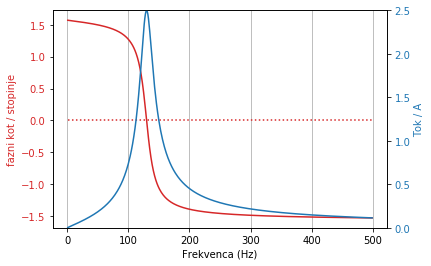

In [0]:
## Izris faznega kota in toka v odvisnosti od frekvence - izziv 2.3.1
L=150e-3
R=20
C=1e-5
U=50
freq=np.arange(1,500,1)
omega=2*np.pi*freq

ZRLC=R+1j*omega*L+1/(1j*omega*C)
I=U/ZRLC
faza= np.angle(I)

def f():
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Frekvenca (Hz)')
    ax1.set_ylabel('fazni kot / stopinje', color=color)
    ax1.plot(freq, faza, color=color)
    ax1.plot([min(freq),max(freq)], [0,0], color=color,Linestyle=':') # naredi linijo pri faza=0
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(axis='x')

    ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
    ax2.set_ylim(0,U/R)
    color = 'tab:blue'
    ax2.set_ylabel('Tok / A', color=color)  
    ax2.plot(freq, abs(I), color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show()
f()

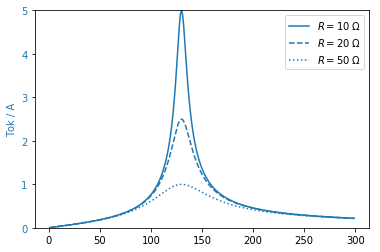

In [0]:
## Izris resonančne krivulje za več upornosti
R=[10,20,50]
C=1e-5
U=50
freq=np.arange(1,300,1)
omega=2*np.pi*freq

Linestyle=['-','--',':']


fig, ax2 = plt.subplots()

ax2.set_ylim(0,U/min(R))
color = 'tab:blue'
for i in range(len(R)):
    ZRLC=R[i]+1j*omega*L+1/(1j*omega*C)
    I=U/ZRLC
    labela=r'$R = $'+str(R[i] ) + r'$ \;\Omega $'
    ax2.plot(freq, abs(I), Linestyle=Linestyle[i],color=color,label=labela)

ax2.set_ylabel('Tok / A', color=color)
ax2.legend()
ax2.tick_params(axis='y', labelcolor=color)
plt.show() # po potrebi razširi